In [1]:
from SwapClass import SwapCore
import utilities

In [34]:
files = utilities.getFileNames()
#files = utilities.getFileNames(data_dir="data 12-8-2022")
#files = utilities.getFileNames(data_dir="data 11-8-2022")
print(files)

['./data/test1.csv', './data/test2pm1_5320us_20_bits_doubletime_0_20.csv', './data/test3pm2_5320us_20_bits_doubletime_60_80.csv']


Average number of points per signal: 15.220338983050848. Should be: 15


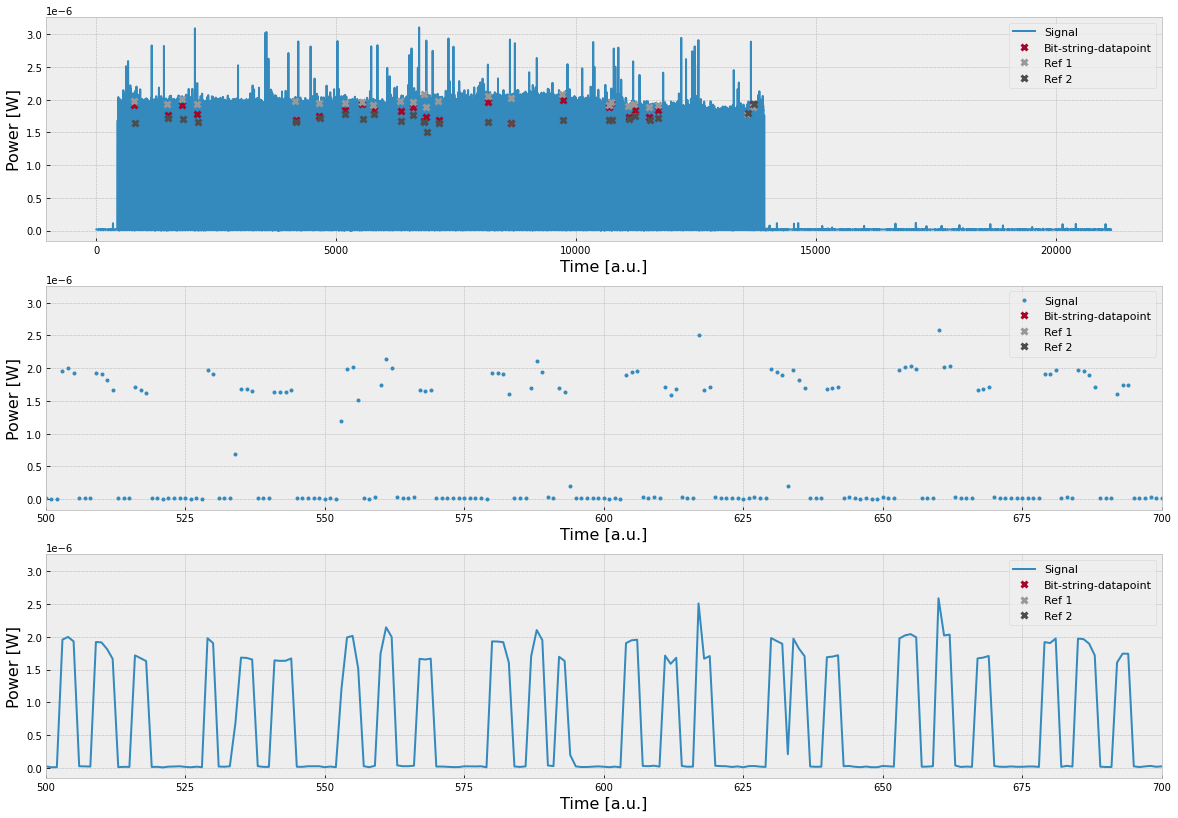

In [35]:
#signal = SwapCore('./data/test1.csv')
signal = SwapCore(files[0])
signal.set_parameters(horizontal_distance=1,max_peak_distance=8, number_of_peaks_per_signal=3,min_height_peak=1*10**(-6))

x = 500
y = 700
signal.plot(x_lim=[x,y])

Time interval counts:
3.000     13775
2.000      5947
5.000       391
4.000       247
6.000       237
          ...  
2.831         1
2.602         1
3.277         1
2.726         1
41.000        1
Name: interval, Length: 465, dtype: int64
Interval mean = 2.8360183399508414, std = 1.2686208488685913


,ref1,ref2,dataPoint,Pn
count,2.500000e+01,2.500000e+01,2.500000e+01,25.000000
mean,1.953712e-06,1.702840e-06,1.820652e-06,0.470541
std,6.800900e-08,7.746788e-08,1.012126e-07,0.303487
min,1.774100e-06,1.506600e-06,1.637100e-06,0.005452
25%,1.916700e-06,1.654700e-06,1.739100e-06,0.191740
50%,1.954700e-06,1.694000e-06,1.835000e-06,0.485125
75%,1.973500e-06,1.725000e-06,1.913900e-06,0.767593
max,2.091400e-06,1.934500e-06,1.997700e-06,0.945552


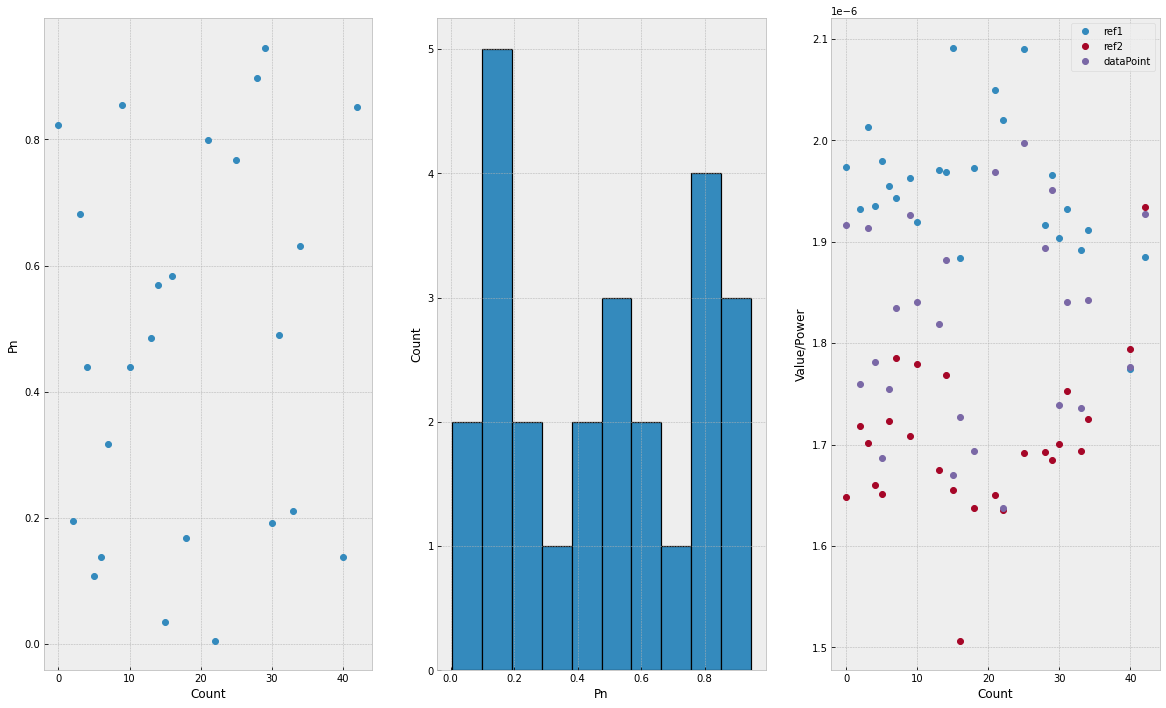

In [36]:
peaks = signal.analyze_peaks()
peaks.drop(['ref1_index','ref2_index','dataPoint_index'],axis=1, inplace=True)
utilities.plotStats(peaks)
signal.calculate_time_interval()
peaks.describe()